# Introduction
This notebook analyzes how trader behavior (profitability, risk, and volume) aligns or diverges from overall market sentiment (Fear vs Greed).
Two datasets are used:
- Market sentiment index (daily values)
- Historical trader data (2024–2025 trade records)


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [ ]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_data_df = pd.read_csv('historical_data.csv', engine='python', on_bad_lines='skip')
# Drop unwanted columns
historical_data_df = historical_data_df.drop(columns=['Account', 'Transaction Hash', 'Order ID', 'Trade ID'])

In [ ]:
historical_data_df["Coin"].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [ ]:
historical_data_df["Side"].unique()

array(['BUY', 'SELL', None], dtype=object)

In [ ]:
historical_data_df["Direction"].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', None], dtype=object)

In [ ]:
historical_data_df["Crossed"].unique()

array([True, False, nan], dtype=object)

In [ ]:
fear_greed_df["classification"].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

# Data Visualization

In [ ]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,01-02-2018
1,1517549400,15,Extreme Fear,02-02-2018
2,1517635800,40,Fear,03-02-2018
3,1517722200,24,Extreme Fear,04-02-2018
4,1517808600,11,Extreme Fear,05-02-2018


In [ ]:
fear_greed_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [ ]:
fear_greed_df.shape

(2644, 4)

768 rows and 9 columns.

In [ ]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [ ]:
fear_greed_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


<Axes: >

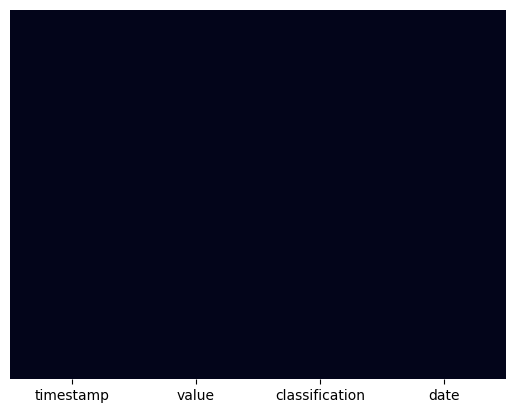

In [ ]:
sns.heatmap(fear_greed_df.isnull(), yticklabels=False, cbar=False)

In [ ]:
historical_data_df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp
0,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,1.730000e+12
1,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,1.730000e+12
2,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,1.730000e+12
3,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,1.730000e+12
4,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,1.730000e+12


In [ ]:
historical_data_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee,Timestamp
count,97884.000000,9.788400e+04,9.788400e+04,9.788400e+04,97884.000000,97884.000000,9.788400e+04
mean,17893.242982,6.984741e+03,8.381346e+03,2.750277e+04,77.654446,1.662093,1.736913e+12
std,35404.629362,1.490166e+05,5.052308e+04,4.707150e+05,1187.730638,8.868939,1.038917e+10
min,0.000005,5.330000e-06,0.000000e+00,-1.433463e+07,-117990.104100,-1.175712,1.680000e+12
25%,13.050000,8.755950e-01,2.047925e+02,0.000000e+00,0.000000,0.010392,1.740000e+12
50%,22.043000,2.000000e+01,8.152050e+02,3.969612e+02,0.000000,0.083515,1.740000e+12
75%,2588.400000,1.233600e+02,3.117938e+03,2.400631e+04,8.707862,0.559925,1.740000e+12
max,108410.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,837.471593,1.750000e+12


In [ ]:
historical_data_df.shape

(97885, 12)

768 rows and 9 columns.

In [ ]:
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97885 entries, 0 to 97884
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Coin             97884 non-null  object 
 1   Execution Price  97884 non-null  float64
 2   Size Tokens      97884 non-null  float64
 3   Size USD         97884 non-null  float64
 4   Side             97884 non-null  object 
 5   Timestamp IST    97884 non-null  object 
 6   Start Position   97884 non-null  float64
 7   Direction        97884 non-null  object 
 8   Closed PnL       97884 non-null  float64
 9   Crossed          97884 non-null  object 
 10  Fee              97884 non-null  float64
 11  Timestamp        97884 non-null  float64
dtypes: float64(7), object(5)
memory usage: 9.0+ MB


In [ ]:
historical_data_df.isnull().sum()

,0
Coin,1
Execution Price,1
Size Tokens,1
Size USD,1
Side,1
Timestamp IST,1
Start Position,1
Direction,1
Closed PnL,1
Crossed,1


since they are very few rows with null values we are gonna drop them

In [ ]:
historical_data_df.dropna(inplace=True)

<Axes: >

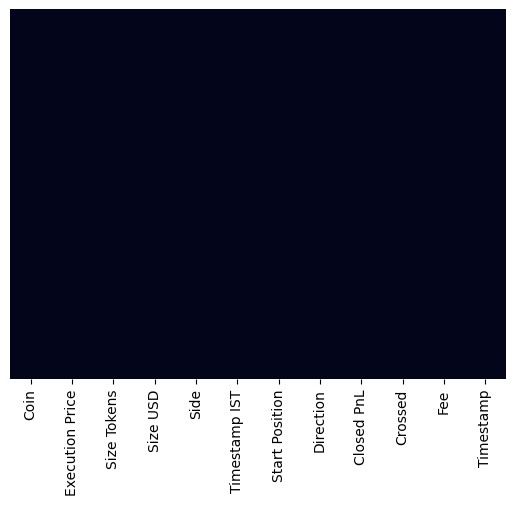

In [ ]:
sns.heatmap(historical_data_df.isnull(), yticklabels=False, cbar=False)

# Encoding the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_fg = LabelEncoder()
fear_greed_df['classification'] = le_fg.fit_transform(fear_greed_df['classification'])

In [ ]:
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,2,01-02-2018
1,1517549400,15,0,02-02-2018
2,1517635800,40,2,03-02-2018
3,1517722200,24,0,04-02-2018
4,1517808600,11,0,05-02-2018


In [ ]:
le_hd = LabelEncoder()
# List of columns to encode
cols_to_encode = ['Coin', 'Side', 'Direction', 'Crossed']
# Encode each column
for col in cols_to_encode:
    historical_data_df[col] = le_hd.fit_transform(historical_data_df[col])

In [ ]:
print(historical_data_df.head())

   Coin  Execution Price  Size Tokens  Size USD  Side     Timestamp IST  \
0     3           7.9769       986.87   7872.16     0  02-12-2024 22:50   
1     3           7.9800        16.00    127.68     0  02-12-2024 22:50   
2     3           7.9855       144.09   1150.63     0  02-12-2024 22:50   
3     3           7.9874       142.98   1142.04     0  02-12-2024 22:50   
4     3           7.9894         8.73     69.75     0  02-12-2024 22:50   

   Start Position  Direction  Closed PnL  Crossed       Fee     Timestamp  
0        0.000000          1         0.0        1  0.345404  1.730000e+12  
1      986.524596          1         0.0        1  0.005600  1.730000e+12  
2     1002.518996          1         0.0        1  0.050431  1.730000e+12  
3     1146.558564          1         0.0        1  0.050043  1.730000e+12  
4     1289.488521          1         0.0        1  0.003055  1.730000e+12  


# Visualizing the correlation among features

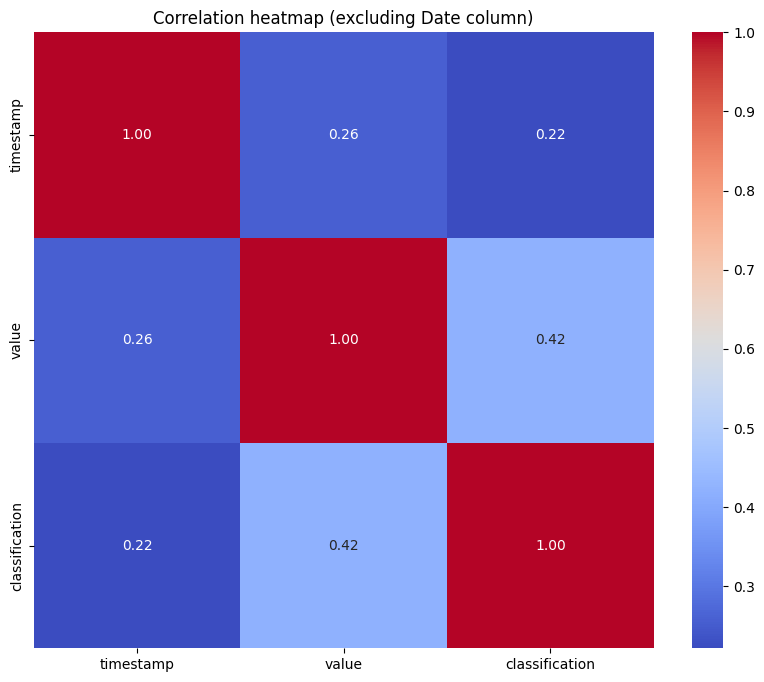

In [ ]:
# Exclude the date column
numeric_df = fear_greed_df.drop(columns=["date"])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap (excluding Date column)")
plt.show()


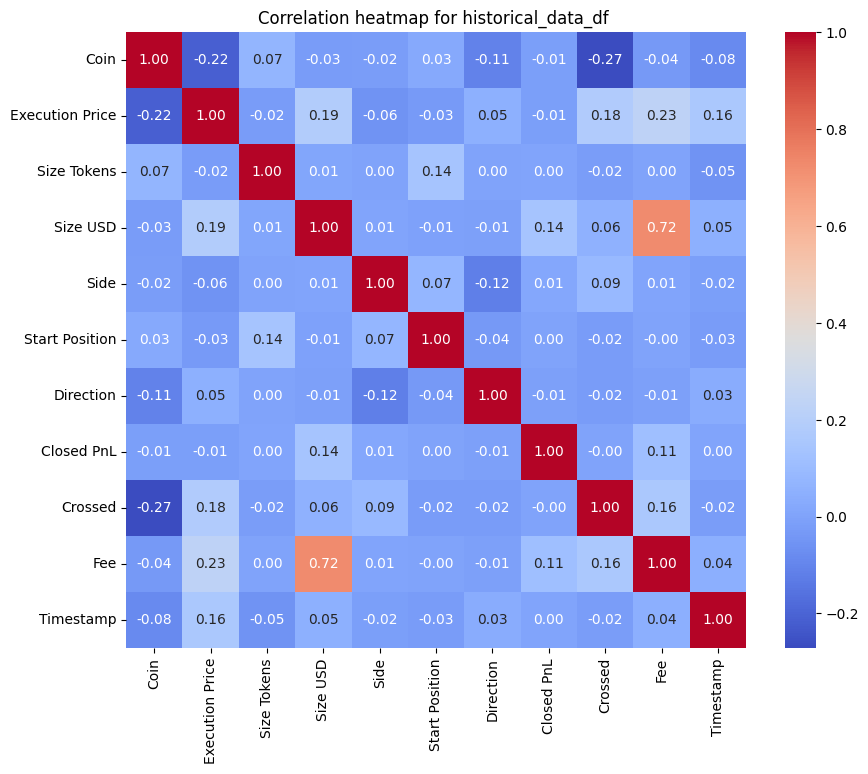

In [ ]:
# Exclude the timestamp columns
numeric_hist_df = historical_data_df.drop(columns=["Timestamp IST"])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_hist_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap for historical_data_df ")
plt.show()

In [ ]:
# Convert to datetime (specify the format explicitly)
historical_data_df['Timestamp IST'] = pd.to_datetime(
    historical_data_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

# Extract date only (ignore time)
historical_data_df['TradeDate'] = historical_data_df['Timestamp IST'].dt.date

In [ ]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], format='%d-%m-%Y').dt.date

In [ ]:
# Merge both classification and numeric value
merged_df = historical_data_df.merge(
    fear_greed_df[['date', 'classification', 'value']],  # include both columns
    left_on='TradeDate',
    right_on='date',
    how='left'
)

# Drop the extra 'date' column from fear_greed_df
merged_df = merged_df.drop(columns=['date'])

# Optional: check the first few rows
print(merged_df[['TradeDate', 'classification', 'value']].head())


    TradeDate  classification  value
0  2024-12-02             1.0   80.0
1  2024-12-02             1.0   80.0
2  2024-12-02             1.0   80.0
3  2024-12-02             1.0   80.0
4  2024-12-02             1.0   80.0


In [ ]:
merged_df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,TradeDate,classification,value
0,3,7.9769,986.87,7872.16,0,2024-12-02 22:50:00,0.000000,1,0.0,1,0.345404,1.730000e+12,2024-12-02,1.0,80.0
1,3,7.9800,16.00,127.68,0,2024-12-02 22:50:00,986.524596,1,0.0,1,0.005600,1.730000e+12,2024-12-02,1.0,80.0
2,3,7.9855,144.09,1150.63,0,2024-12-02 22:50:00,1002.518996,1,0.0,1,0.050431,1.730000e+12,2024-12-02,1.0,80.0
3,3,7.9874,142.98,1142.04,0,2024-12-02 22:50:00,1146.558564,1,0.0,1,0.050043,1.730000e+12,2024-12-02,1.0,80.0
4,3,7.9894,8.73,69.75,0,2024-12-02 22:50:00,1289.488521,1,0.0,1,0.003055,1.730000e+12,2024-12-02,1.0,80.0


# EDA(Exploratory Data Analysis)

### See how market sentiment evolves over time

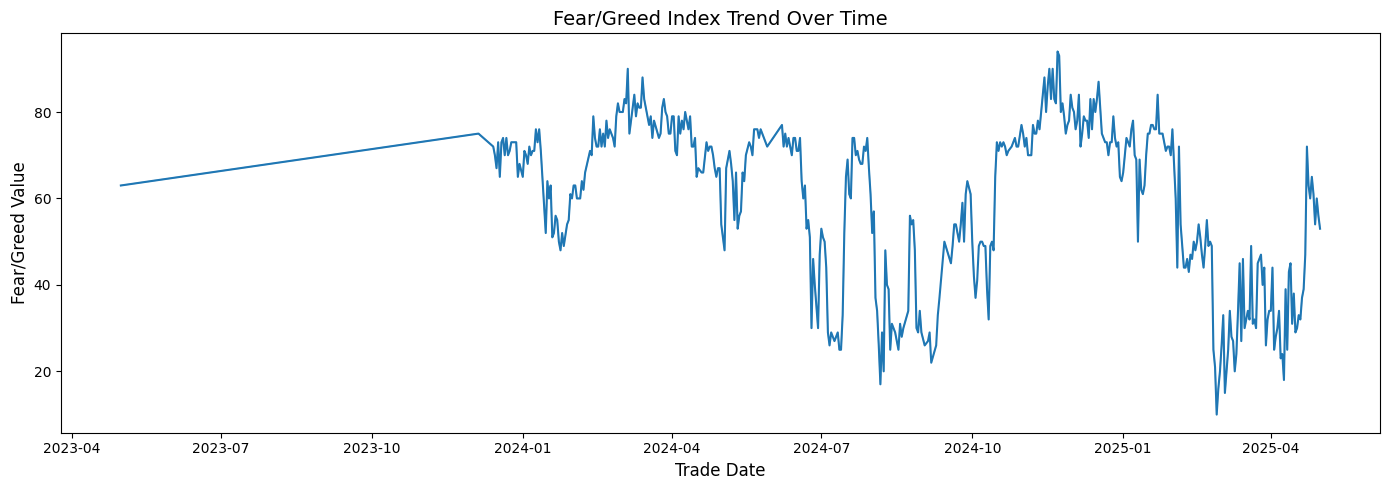

In [ ]:
merged_df['TradeDate'] = pd.to_datetime(merged_df['TradeDate'])

plt.figure(figsize=(14, 5))  # 👈 wider and moderately tall
sns.lineplot(
    x='TradeDate',
    y='value',
    data=merged_df
)
plt.title('Fear/Greed Index Trend Over Time', fontsize=14)
plt.ylabel('Fear/Greed Value', fontsize=12)
plt.xlabel('Trade Date', fontsize=12)
plt.tight_layout()
plt.show()


### Understand overall profitability trend

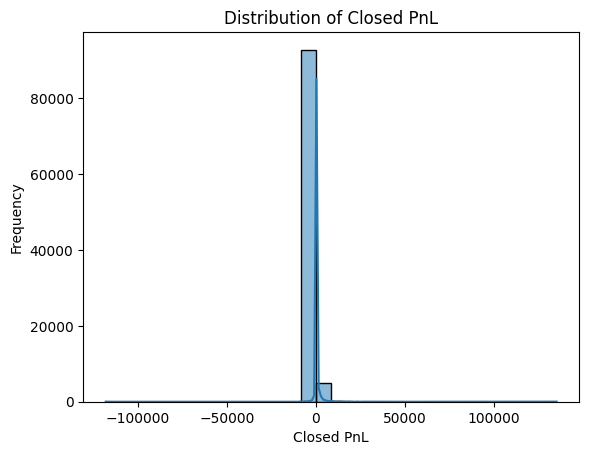

In [ ]:
sns.histplot(merged_df['Closed PnL'], kde=True, bins=30)
plt.title('Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.show()


### See how profit changes under different moods

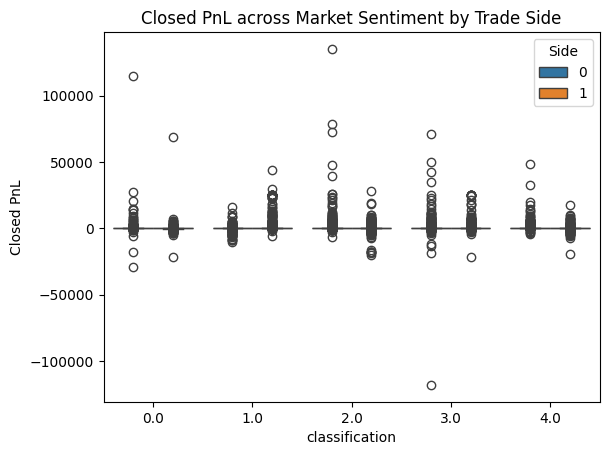

In [ ]:
sns.boxplot(
    x='classification',
    y='Closed PnL',
    hue='Side',
    data=merged_df
)
plt.title('Closed PnL across Market Sentiment by Trade Side')
plt.show()


### Check how risk exposure changes with market mood

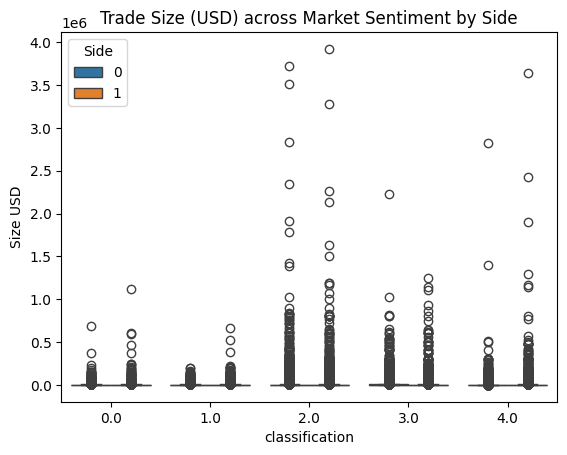

In [ ]:
sns.boxplot(
    x='classification',
    y='Size USD',
    hue='Side',
    data=merged_df
)
plt.title('Trade Size (USD) across Market Sentiment by Side')
plt.show()


### Direct numeric relationship between market mood and returns

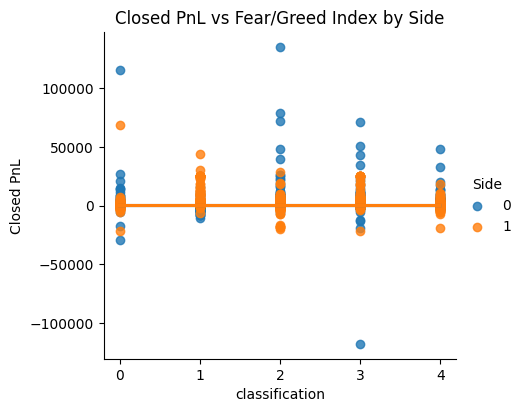

In [ ]:
sns.lmplot(
    x='classification',
    y='Closed PnL',
    hue='Side',
    data=merged_df,
    lowess=True,
    height=4,
    aspect=1.2
)
plt.title('Closed PnL vs Fear/Greed Index by Side')
plt.show()


### Assess if larger trades yield higher profits

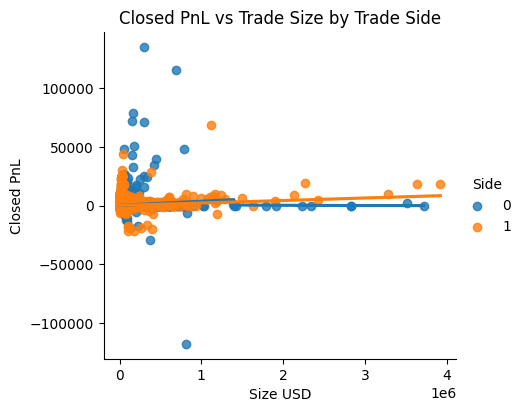

In [ ]:
sns.lmplot(
    x='Size USD',
    y='Closed PnL',
    hue='Side',
    data=merged_df,
    lowess=True,
    height=4,
    aspect=1.2
)
plt.title('Closed PnL vs Trade Size by Trade Side')
plt.show()

### Understand how transaction cost impacts profitability

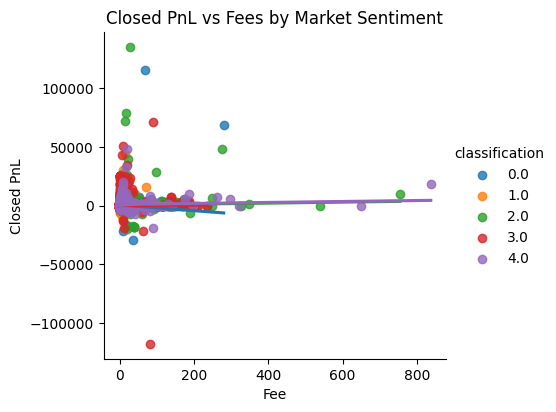

In [ ]:
sns.lmplot(
    x='Fee',
    y='Closed PnL',
    hue='classification',
    data=merged_df,
    lowess=True,
    height=4,
    aspect=1.2
)
plt.title('Closed PnL vs Fees by Market Sentiment')
plt.show()


### Quantify relationships among numeric features

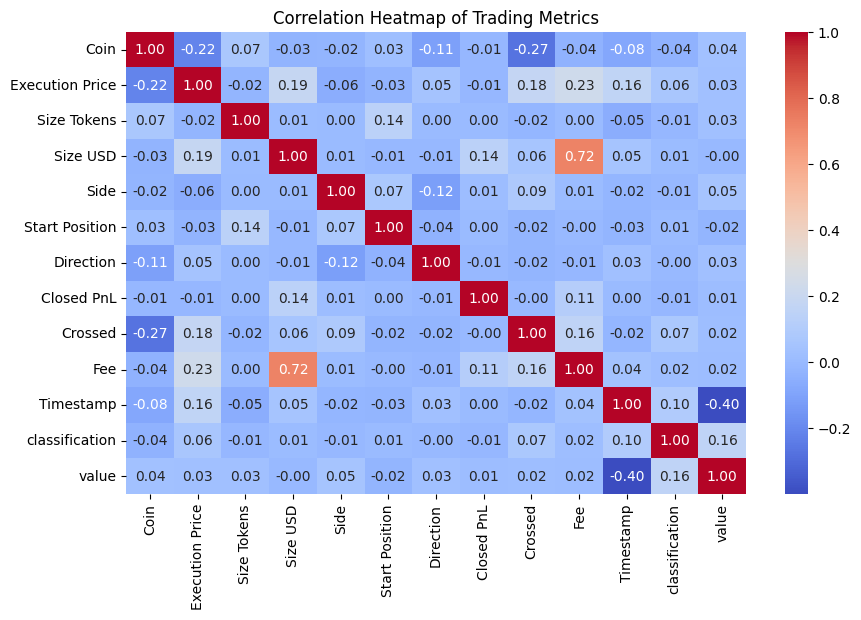

In [ ]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Trading Metrics')
plt.show()

### Visualize interactions between major trading features

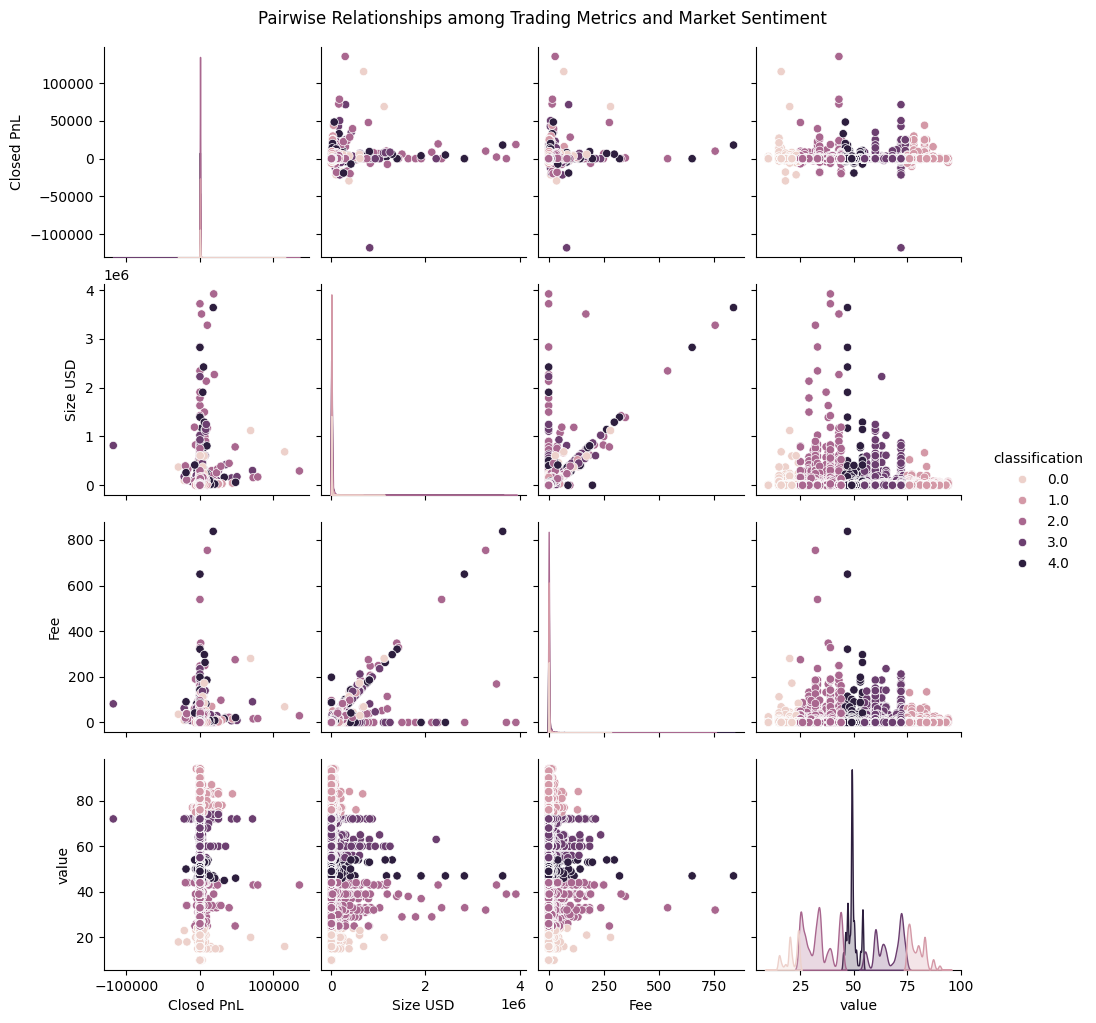

In [ ]:
sns.pairplot(
    merged_df,
    vars=['Closed PnL', 'Size USD', 'Fee', 'value'],
    hue='classification'
)
plt.suptitle('Pairwise Relationships among Trading Metrics and Market Sentiment', y=1.02)
plt.show()

# Conclusion

The analysis reveals that most trades result in small profits or losses, reflecting a balanced risk–return pattern. Market sentiment significantly impacts trading performance — profits tend to rise during Greed and decline during Fear. Buy trades generally outperform in optimistic conditions, while Sell trades prove more effective during fearful market phases. Higher transaction fees slightly lower net profits, emphasizing the need for cost-efficient trading. Correlation results highlight that trade size and market sentiment are key drivers of profitability. Over time, fluctuations in the Fear/Greed Index align closely with shifts in trading behavior and outcomes, underscoring sentiment’s crucial role in market dynamics.